In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [3]:
cces = pd.read_csv('cces_example_data.csv', header = 0)

In [4]:
cces.head()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasParty,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid
0,2,6,2,2,1,56,6,1,1,1.000000,...,-99,-99,-96,2.666667,1.000000,5.00,4.857143,0,0.505028,1231308943
1,2,4,2,5,1,53,13,1,2,3.000000,...,-100,-100,-100,2.000000,2.000000,5.00,5.000000,0,0.852381,1232300315
2,1,2,1,2,1,69,10,2,5,4.333333,...,99,99,96,1.000000,1.000000,5.00,5.000000,2,1.320189,1232358697
3,2,3,1,6,1,76,97,1,3,1.000000,...,-86,-91,-89,4.666667,1.333333,4.25,4.428571,0,0.519198,1232540961
4,4,5,2,6,1,83,4,1,2,1.000000,...,-80,-88,-87,4.666667,3.666667,4.25,5.000000,0,1.154005,1232580601


In [5]:
cces = cces.astype({'sex': 'category', 'pid3': 'category', 'Evaluation': 'category'})

In [6]:
rt_model = ols("Real_Threat ~ pid3 + ConMediaUse + pid3 * ConMediaUse", data = cces).fit()

In [7]:
rt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Real_Threat   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     22.61
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.89e-21
Time:                        19:47:08   Log-Likelihood:                -949.79
No. Observations:                 659   AIC:                             1912.
Df Residuals:                     653   BIC:                             1939.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.2927      0.137     31.276      0.000       4.023       4.562
pid3[T.2]                -0.9482      0.239     -3.964      0.000      -1.418      -0.478
pid3[T.3]                -1.2548      0.197     -6.368      0.000      -1.642      -0.868
ConMediaUse              -0.1428      0.063     -2.263      0.024      -0.267      -0.019
pid3[T.2]:ConMediaUse     0.3983      0.086      4.635      0.000       0.230       0.567
pid3[T.3]:ConMediaUse     0.2579      0.083      3.109      0.002       0.095       0.421
==============================================================================
Omnibus:                       39.788   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.977
Skew:                          -0.647   Prob(JB):                     1.04e-10
Kurtosis:                       3.026   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: xlabel='ConMediaUse', ylabel='Real_Threat'>

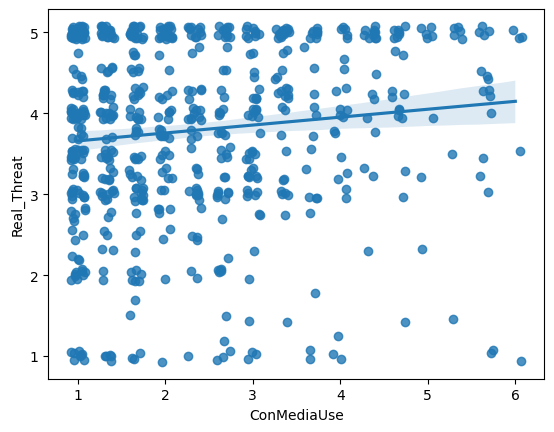

In [7]:
sns.regplot(data = cces, y = 'Real_Threat', x = 'ConMediaUse', x_jitter = .08, y_jitter = .08)

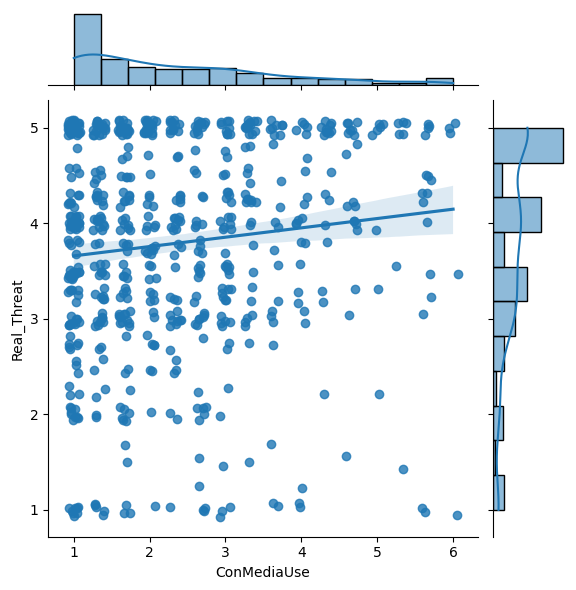

In [8]:
sns.jointplot(data = cces, y = 'Real_Threat', x = 'ConMediaUse', x_jitter = .08, y_jitter = .08, kind = 'reg')

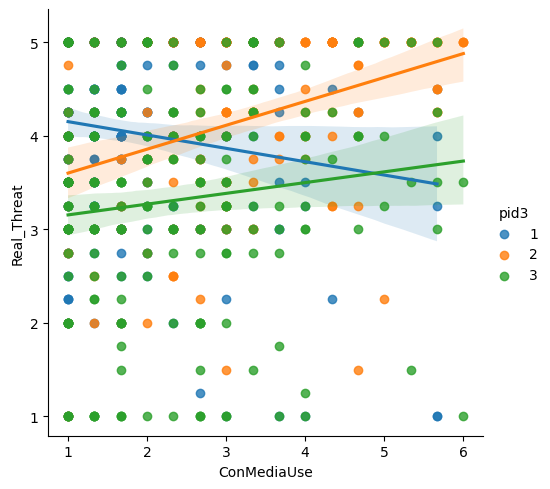

In [9]:
sns.lmplot(data = cces, y = 'Real_Threat', x = 'ConMediaUse', x_jitter = .0, y_jitter = .0, hue = 'pid3')

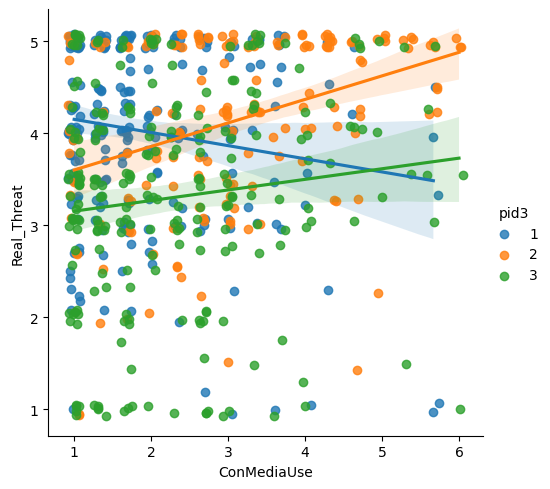

In [10]:
sns.lmplot(data = cces, y = 'Real_Threat', x = 'ConMediaUse', x_jitter = .08, y_jitter = .08, hue = 'pid3')

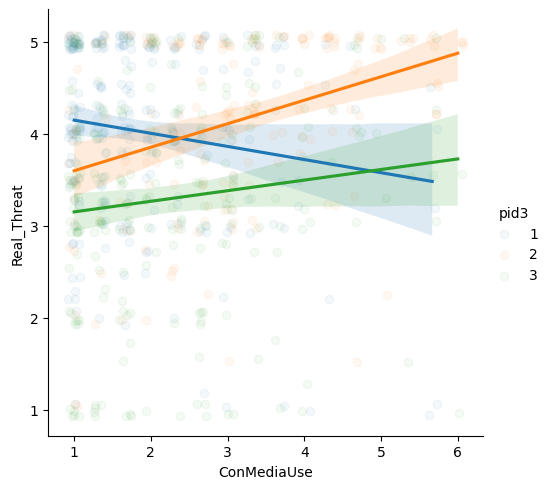

In [11]:
sns.lmplot(data = cces, y = 'Real_Threat', x = 'ConMediaUse', x_jitter = .08, y_jitter = .08, hue = 'pid3',
          scatter_kws={'alpha':0.05})

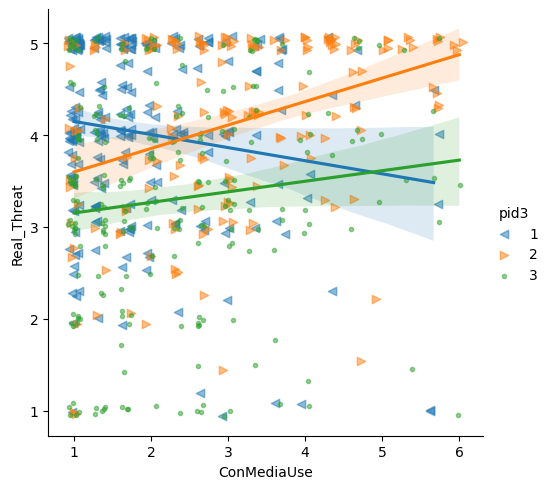

In [12]:
sns.lmplot(data = cces, y = 'Real_Threat', x = 'ConMediaUse', x_jitter = .08, y_jitter = .08, hue = 'pid3',
           scatter_kws={'alpha':0.5}, markers = ['<', '>', '.'])

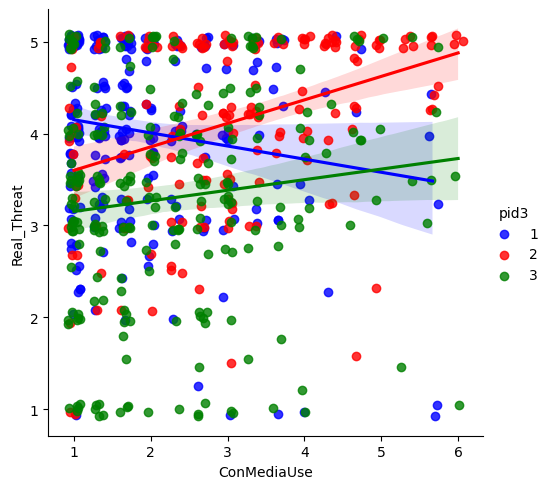

In [13]:
sns.lmplot(data = cces, y = 'Real_Threat', x = 'ConMediaUse', x_jitter = .08, y_jitter = .08, hue = 'pid3',
          palette = ['blue', 'red', 'green'])

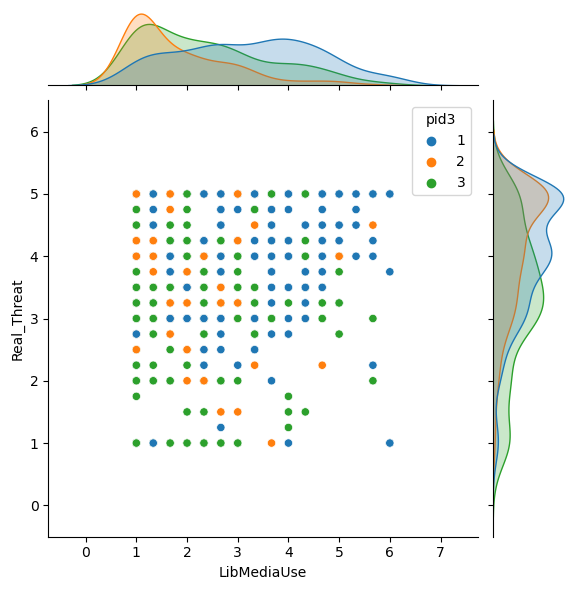

In [10]:
sns.jointplot(data = cces, y = 'Real_Threat', x = 'LibMediaUse', hue = 'pid3')